# T81-577 Applied Data Science Individual Project
# Mobile Strategy Games User Rating Prediction
# Tong Yan

## 1. Project Overview

For this project, I will be using the appstore_games dataset to predict the average user ratings of mobile strategy games. I am interested in the distribution of user ratings and the factors that influence the ratings. I will try 3 different regression models, and use Hyperparameter Tuning methods to improve the model performances. Finally, I will choose a final model with the lowest ROOT MEAN SQURE ERROR (RMSE) and output the predicting result for the testing dataset. 

Table of Contents:

1. Project Overview

2. Data Exploration
 
3. Data Preprocessing
 
4. Predictive Modeling

    4.1. Split dataset into train/test

    4.2. Create a pipeline

    4.3. Model fitting & Making prediction
    
        4.3.1 Linear Regression
        
        4.3.2 Random Forest
        
        4.3.3 Gradient Boosting

5. Model Comparasion & Selection

6. Conclusion

7. Implementation & Limitations
    


## 2. Data Exploration

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

help(sns)

Help on package seaborn:

NAME
    seaborn - # Capture the original matplotlib rcParams

PACKAGE CONTENTS
    algorithms
    apionly
    axisgrid
    categorical
    cm
    colors (package)
    conftest
    distributions
    external (package)
    linearmodels
    matrix
    miscplot
    palettes
    rcmod
    regression
    relational
    tests (package)
    timeseries
    utils
    widgets

DATA
    crayons = {'Almond': '#EFDECD', 'Antique Brass': '#CD9575', 'Apricot':...
    xkcd_rgb = {'acid green': '#8ffe09', 'adobe': '#bd6c48', 'algae': '#54...

VERSION
    0.10.0

FILE
    /opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/__init__.py




In [196]:
# Have a primary look at the dataset
df = pd.read_csv('/Users/stellayan/Desktop/Individual Project/appstore_games.csv', na_values = ['NA', '?'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

In [197]:
df.isnull().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

In [198]:
df.head(5)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [199]:
# Drop useless columns
df = df.drop(['URL','ID','Name','Icon URL', 'Primary Genre', 'Subtitle', 'Description', 'Developer', 'Languages', 
               'Original Release Date', 'Current Version Release Date'], axis = 1)
df.columns = ['ave_rating', 'rating_count', 'price', 'inapp_purchase', 'age_rating', 'size', 'genre']

In [201]:
df.head(10)

,ave_rating,rating_count,price,inapp_purchase,age_rating,size,genre
0,4.0,3553.0,2.99,NaN,4+,15853568.0,"Games, Strategy, Puzzle"
1,3.5,284.0,1.99,NaN,4+,12328960.0,"Games, Strategy, Board"
2,3.0,8376.0,0.00,NaN,4+,674816.0,"Games, Board, Strategy"
3,3.5,190394.0,0.00,NaN,4+,21552128.0,"Games, Strategy, Puzzle"
4,3.5,28.0,2.99,NaN,4+,34689024.0,"Games, Strategy, Board, Education"
5,3.0,47.0,0.00,1.99,4+,48672768.0,"Games, Entertainment, Strategy, Puzzle"
6,2.5,35.0,0.00,NaN,4+,6328320.0,"Games, Entertainment, Puzzle, Strategy"
7,2.5,125.0,0.99,NaN,4+,64333824.0,"Games, Strategy, Board"
8,2.5,44.0,0.00,NaN,4+,2657280.0,"Games, Strategy, Board, Entertainment"
9,2.5,184.0,0.00,NaN,4+,1466515.0,"Games, Casual, Strategy"


In [210]:
# Have a look at the distribuiton of average rating
plt.figure(figsize = (10,6))
img1 = sns.countplot(x = df['ave_rating'])
img1.set(xlabel = 'average rating', ylabel = 'count')
img1.plot()

[]

In [204]:
# Have a look at the distribuiton of price
plt.figure(figsize = (20,10))
img2 = sns.countplot(x = df['price'])
img2.set(xlabel = 'price', ylabel = 'count')
img2.plot()

[]

In [205]:
# Have a look at the distribuiton of age ratings
plt.figure(figsize = (10,6))
img3 = sns.countplot(x = df['age_rating'])
img3.set(xlabel = 'age rating', ylabel = 'count')
img3.plot()

[]

In [206]:
# Have a look at the distribuiton of gneres
list = []
for i in range(len(df)):
    for j in df['genre'][i].split(','):
        list.append(j)

from collections import Counter
c = Counter(list)
top_genre = pd.DataFrame(c.most_common(20))

In [207]:
plt.figure(figsize = (25,10))
img4 = sns.barplot(x = top_genre[0], y = top_genre[1])
img4.set(xlabel = 'genre', ylabel = 'count')
img4.plot()

[]

In [208]:
# Have a look at the distribuiton of app sizes
plt.figure(figsize = (16,8))
img5 = sns.distplot(df['size'])
img5.set(xlabel = 'size', ylabel = 'count')
img5.plot()

[]

## 3. Data Preprocessing

In [117]:
# Drop the rows wihtout 'ave_rating' value
df1.drop(df1[np.isnan(df1['ave_rating'])].index, inplace = True)

# Drop the rows wihtout 'size' value
df1.drop(df1[np.isnan(df1['size'])].index, inplace = True)

# Drop the rows with 'rating_count' less than 5
df1.drop(df1[df1['rating_count'] < 5].index, inplace = True)

df1.reset_index(inplace = True, drop = True)

In [118]:
# Impute values for column 'inapp_purchase' 
df1['inapp_purchase'].fillna(int(0), inplace = True)
df1

,ave_rating,rating_count,price,inapp_purchase,age_rating,size,genre
0,4.0,3553.0,2.99,0,4+,15853568.0,"Games, Strategy, Puzzle"
1,3.5,284.0,1.99,0,4+,12328960.0,"Games, Strategy, Board"
2,3.0,8376.0,0.00,0,4+,674816.0,"Games, Board, Strategy"
3,3.5,190394.0,0.00,0,4+,21552128.0,"Games, Strategy, Puzzle"
4,3.5,28.0,2.99,0,4+,34689024.0,"Games, Strategy, Board, Education"
...,...,...,...,...,...,...,...
7556,3.0,6.0,0.00,0,12+,151308288.0,"Games, Strategy, Entertainment, Puzzle"
7557,5.0,30.0,0.00,0,4+,79646720.0,"Games, Entertainment, Action, Strategy"
7558,5.0,51.0,0.00,0,9+,125348864.0,"Games, Simulation, Strategy"
7559,5.0,5.0,0.00,0,4+,128687104.0,"Games, Simulation, Strategy"


In [119]:
# Replace objects in 'inapp_purchase' with mean of in-app purchase prices of each game
for i in range(len(df1)): 
    if df1.loc[i, 'inapp_purchase'] != 0:
        a = df1.loc[i, 'inapp_purchase'].split(',')
        df1.loc[i, 'inapp_purchase'] = 0
        c = 0
        for j in a:
            df1.loc[i, 'inapp_purchase'] = float(df1.loc[i, 'inapp_purchase']) + float(j)
            c += 1
        df1.loc[i, 'inapp_purchase'] = df1.loc[i, 'inapp_purchase']/c
df1['inapp_purchase'] = pd.to_numeric(df1['inapp_purchase'])

In [120]:
# Remove '+' in 'age_rating' and convert to integer
for i in range(len(df1)):
    for j in (4,9,12,17):
        if ('{}+'.format(j)) == str(df1.loc[i, 'age_rating']):
            df1.loc[i, 'age_rating'] = j
df1['age_rating'] = pd.to_numeric(df1['age_rating'])

In [121]:
# Convert 'genre' to dummy variables
genre = np.unique(list).tolist()

# Remove space before some genres
genres = []
for i in range(len(genre)):
    genres.append(genre[i].strip())
genres

['Action',
 'Adventure',
 'Animals & Nature',
 'Art',
 'Board',
 'Books',
 'Business',
 'Card',
 'Casino',
 'Casual',
 'Comics & Cartoons',
 'Education',
 'Emoji & Expressions',
 'Entertainment',
 'Family',
 'Finance',
 'Food & Drink',
 'Games',
 'Gaming',
 'Health & Fitness',
 'Kids & Family',
 'Lifestyle',
 'Magazines & Newspapers',
 'Medical',
 'Music',
 'Navigation',
 'News',
 'People',
 'Photo & Video',
 'Places & Objects',
 'Productivity',
 'Puzzle',
 'Racing',
 'Reference',
 'Role Playing',
 'Shopping',
 'Simulation',
 'Social Networking',
 'Sports',
 'Sports & Activities',
 'Stickers',
 'Strategy',
 'Travel',
 'Trivia',
 'Utilities',
 'Weather',
 'Word',
 'Books',
 'Business',
 'Education',
 'Entertainment',
 'Finance',
 'Food & Drink',
 'Games',
 'Health & Fitness',
 'Lifestyle',
 'Medical',
 'Music',
 'Navigation',
 'News',
 'Productivity',
 'Reference',
 'Shopping',
 'Social Networking',
 'Sports',
 'Stickers',
 'Travel',
 'Utilities']

In [122]:
# Convert 'genre' to dummy variables
# As there are multiple elements in one cell, I convert 'genre' to dummy variables manually
for g in genres:
    df1['genre_{}'.format(g)] = 0

In [123]:
for i in genres:
    for j in range(len(df1)):
        if i in df1.loc[j, 'genre']:
            df1.loc[j, 'genre_{}'.format(i)] = 1
df1.drop(['genre'], axis = 1, inplace = True)
df1

,ave_rating,rating_count,price,inapp_purchase,age_rating,size,genre_Action,genre_Adventure,genre_Animals & Nature,genre_Art,...,genre_Social Networking,genre_Sports,genre_Sports & Activities,genre_Stickers,genre_Strategy,genre_Travel,genre_Trivia,genre_Utilities,genre_Weather,genre_Word
0,4.0,3553.0,2.99,0.0,4,15853568.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3.5,284.0,1.99,0.0,4,12328960.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3.0,8376.0,0.00,0.0,4,674816.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3.5,190394.0,0.00,0.0,4,21552128.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3.5,28.0,2.99,0.0,4,34689024.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.0,6.0,0.00,0.0,12,151308288.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7557,5.0,30.0,0.00,0.0,4,79646720.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7558,5.0,51.0,0.00,0.0,9,125348864.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7559,5.0,5.0,0.00,0.0,4,128687104.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## 4. Predictive Modeling

### 4.1 Split dataset into train/test

In [124]:
# Split the datasets into training and testing data
from sklearn.model_selection import train_test_split

df_x = df1.drop(['ave_rating'], axis = 1)

X = df_x
y = df1['ave_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

### 4.2 Create a pipeline

In [135]:
# Create a pipeline of imputing empty values, creating polynomial features and feature scaling
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create a transformer
transformer = ColumnTransformer([("norm1", SimpleImputer(missing_values = np.nan, strategy = 'mean'),[2]),
                                 ('poly', PolynomialFeatures(3),[2,3])])

# Create pipelines of three different regression algorithms
# Linear Regression pipeline
ln_model = Pipeline(steps=([('transformer', transformer),
                            ('scaler',MinMaxScaler()),
                            ('LR1', LinearRegression())]))

# Random Forest pipeline
rf_model = Pipeline(steps=([('transformer', transformer),
                            ('scaler',MinMaxScaler()),
                            ('LR2', RandomForestRegressor())]))

# Gradient Boosting pipeline
gb_model = Pipeline(steps=([('transformer', transformer),
                            ('scaler',MinMaxScaler()),
                            ('LR3', GradientBoostingRegressor())]))

In [126]:
# Verify the number of missing value
df1.isnull().sum().sum()

0

### 4.3 Model fitting & Making prediction

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

# Create an empty dataframe for RMSE scores
df_rmse = pd.DataFrame(columns = ['model', 'rmse_score'])

### 4.3.1 Linear Regression

In [137]:
# Have a look at the parameters
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Predicted')

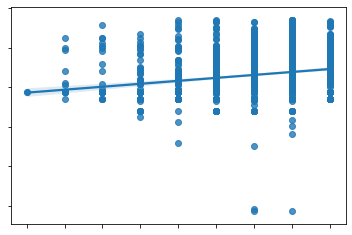

In [138]:
# Fit linear model into the training data and make prediction
ln = ln_model.fit(X_train,y_train)
y_pred1 = ln_model.predict(X_test)

sns.regplot(y_test, y_pred1)
plt.xlabel("Observed")
plt.ylabel("Predicted")

In [139]:
# Measure and record model accuracy
rmse1 = metrics.mean_squared_error(y_test, y_pred1)
df_rmse = df_rmse.append([{'model' : 'linear',
                           'rmse_score' : rmse1}],
                         ignore_index = True)
print('RMSE for this model is: {}'.format(rmse1))

RMSE for this model is: 0.5465356666411711


### 4.3.2  Random Forest

In [140]:
# Have a look at the parameters
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Text(0, 0.5, 'Predicted')

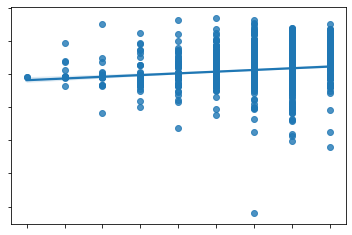

In [141]:
# Fit Random Forest model into the training data and make prediction
rf = rf_model.fit(X_train,y_train)
y_pred2 = rf_model.predict(X_test)

sns.regplot(y_test, y_pred2)
plt.xlabel("Observed")
plt.ylabel("Predicted")

In [142]:
# Measure and record model accuracy
rmse2 = metrics.mean_squared_error(y_test, y_pred2)
df_rmse = df_rmse.append([{'model' : 'random forest',
                           'rmse_score' : rmse2}],
                         ignore_index = True)
print('RMSE for this model is: {}'.format(rmse2))

RMSE for this model is: 0.5754193994060534


#### Grid Search

In [149]:
# Try Grid Search for hyperparameter tuning

param_grid = {
    'LR2__min_samples_split': [1, 2, 3, 4],
    'LR2__min_samples_leaf': [1, 2],
    'LR2__n_estimators': [50, 100, 200, 300, 400]
}

grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 2)
grid_search.fit(X_train, y_train)

best_grid = grid_search.best_estimator_
best_grid

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=50 
[CV]  LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=50, total=   0.0s
[CV] LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=50 
[CV]  LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=50, total=   0.0s
[CV] LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=50 
[CV]  LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=50, total=   0.0s
[CV] LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=100 
[CV]  LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=100, total=   0.0s
[CV] LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=100 
[CV]  LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=100, total=   0.0s
[CV] LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWar

[CV]  LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=100, total=   0.0s
[CV] LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=200 
[CV]  LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=200, total=   0.1s
[CV] LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=200 
[CV]  LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=200, total=   0.1s
[CV] LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=200 
[CV]  LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=200, total=   0.1s
[CV] LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=300 


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an in

[CV]  LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=300, total=   0.1s
[CV] LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=300 
[CV]  LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=300, total=   0.1s
[CV] LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=300 
[CV]  LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=300, total=   0.1s
[CV] LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=400 


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=400, total=   0.1s
[CV] LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=400 
[CV]  LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=400, total=   0.1s
[CV] LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=400 


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  LR2__min_samples_leaf=1, LR2__min_samples_split=1, LR2__n_estimators=400, total=   0.1s
[CV] LR2__min_samples_leaf=1, LR2__min_samples_split=2, LR2__n_estimators=50 
[CV]  LR2__min_samples_leaf=1, LR2__min_samples_split=2, LR2__n_estimators=50, total=   0.4s
[CV] LR2__min_samples_leaf=1, LR2__min_samples_split=2, LR2__n_estimators=50 
[CV]  LR2__min_samples_leaf=1, LR2__min_samples_split=2, LR2__n_estimators=50, total=   0.4s
[CV] LR2__min_samples_leaf=1, LR2__min_samples_split=2, LR2__n_estimators=50 
[CV]  LR2__min_samples_leaf=1, LR2__min_samples_split=2, LR2__n_estimators=50, total=   0.4s
[CV] LR2__min_samples_leaf=1, LR2__min_samples_split=2, LR2__n_estimators=100 
[CV]  LR2__min_samples_leaf=1, LR2__min_samples_split=2, LR2__n_estimators=100, total=   0.7s
[CV] LR2__min_samples_leaf=1, LR2__min_samples_split=2, LR2__n_estimators=100 
[CV]  LR2__min_samples_leaf=1, LR2__min_samples_split=2, LR2__n_estimators=100, total=   0.7s
[CV] LR2__min_samples_leaf=1, LR2__min_samples_

/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an in

[CV]  LR2__min_samples_leaf=2, LR2__min_samples_split=1, LR2__n_estimators=200, total=   0.1s
[CV] LR2__min_samples_leaf=2, LR2__min_samples_split=1, LR2__n_estimators=200 
[CV]  LR2__min_samples_leaf=2, LR2__min_samples_split=1, LR2__n_estimators=200, total=   0.1s
[CV] LR2__min_samples_leaf=2, LR2__min_samples_split=1, LR2__n_estimators=200 
[CV]  LR2__min_samples_leaf=2, LR2__min_samples_split=1, LR2__n_estimators=200, total=   0.1s
[CV] LR2__min_samples_leaf=2, LR2__min_samples_split=1, LR2__n_estimators=300 


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an in

[CV]  LR2__min_samples_leaf=2, LR2__min_samples_split=1, LR2__n_estimators=300, total=   0.1s
[CV] LR2__min_samples_leaf=2, LR2__min_samples_split=1, LR2__n_estimators=300 
[CV]  LR2__min_samples_leaf=2, LR2__min_samples_split=1, LR2__n_estimators=300, total=   0.1s
[CV] LR2__min_samples_leaf=2, LR2__min_samples_split=1, LR2__n_estimators=300 
[CV]  LR2__min_samples_leaf=2, LR2__min_samples_split=1, LR2__n_estimators=300, total=   0.1s
[CV] LR2__min_samples_leaf=2, LR2__min_samples_split=1, LR2__n_estimators=400 


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  LR2__min_samples_leaf=2, LR2__min_samples_split=1, LR2__n_estimators=400, total=   0.1s
[CV] LR2__min_samples_leaf=2, LR2__min_samples_split=1, LR2__n_estimators=400 
[CV]  LR2__min_samples_leaf=2, LR2__min_samples_split=1, LR2__n_estimators=400, total=   0.1s
[CV] LR2__min_samples_leaf=2, LR2__min_samples_split=1, LR2__n_estimators=400 


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  LR2__min_samples_leaf=2, LR2__min_samples_split=1, LR2__n_estimators=400, total=   0.1s
[CV] LR2__min_samples_leaf=2, LR2__min_samples_split=2, LR2__n_estimators=50 
[CV]  LR2__min_samples_leaf=2, LR2__min_samples_split=2, LR2__n_estimators=50, total=   0.4s
[CV] LR2__min_samples_leaf=2, LR2__min_samples_split=2, LR2__n_estimators=50 
[CV]  LR2__min_samples_leaf=2, LR2__min_samples_split=2, LR2__n_estimators=50, total=   0.3s
[CV] LR2__min_samples_leaf=2, LR2__min_samples_split=2, LR2__n_estimators=50 
[CV]  LR2__min_samples_leaf=2, LR2__min_samples_split=2, LR2__n_estimators=50, total=   0.4s
[CV] LR2__min_samples_leaf=2, LR2__min_samples_split=2, LR2__n_estimators=100 
[CV]  LR2__min_samples_leaf=2, LR2__min_samples_split=2, LR2__n_estimators=100, total=   0.7s
[CV] LR2__min_samples_leaf=2, LR2__min_samples_split=2, LR2__n_estimators=100 
[CV]  LR2__min_samples_leaf=2, LR2__min_samples_split=2, LR2__n_estimators=100, total=   0.7s
[CV] LR2__min_samples_leaf=2, LR2__min_samples_

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.3min finished


Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('norm1',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0),
                                                  [2]),
                                                 ('poly',
                                                  PolynomialFeatures(degree=3,
                            

In [150]:
# Measure and record model accuracy
y_pred3 = best_grid.predict(X_test)
rmse3 = metrics.mean_squared_error(y_test, y_pred3)
df_rmse = df_rmse.append([{'model' : 'random forest_grid',
                           'rmse_score' : rmse3}],
                         ignore_index = True)
print('RMSE for this model is: {}'.format(rmse3))

RMSE for this model is: 0.56642917733144


#### Randomized Search

In [155]:
# Try Randomized Search for hyperparameter tuning

param_dist = {
               'LR2__min_samples_split': np.linspace(1, 10, 8, dtype = int),
               'LR2__min_samples_leaf': np.linspace(1, 10, 8, dtype = int),
               'LR2__n_estimators': np.linspace(50, 600, 10, dtype = int)}

random_search = RandomizedSearchCV(estimator = rf_model, param_distributions = param_dist, 
                                   cv = 3, n_jobs = 1, verbose = 2,n_iter = 10)
random_search.fit(X_train, y_train)

best_random= random_search.best_estimator_
best_random

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] LR2__n_estimators=600, LR2__min_samples_split=3, LR2__min_samples_leaf=7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  LR2__n_estimators=600, LR2__min_samples_split=3, LR2__min_samples_leaf=7, total=   3.8s
[CV] LR2__n_estimators=600, LR2__min_samples_split=3, LR2__min_samples_leaf=7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  LR2__n_estimators=600, LR2__min_samples_split=3, LR2__min_samples_leaf=7, total=   3.3s
[CV] LR2__n_estimators=600, LR2__min_samples_split=3, LR2__min_samples_leaf=7 
[CV]  LR2__n_estimators=600, LR2__min_samples_split=3, LR2__min_samples_leaf=7, total=   3.2s
[CV] LR2__n_estimators=600, LR2__min_samples_split=6, LR2__min_samples_leaf=8 
[CV]  LR2__n_estimators=600, LR2__min_samples_split=6, LR2__min_samples_leaf=8, total=   3.5s
[CV] LR2__n_estimators=600, LR2__min_samples_split=6, LR2__min_samples_leaf=8 
[CV]  LR2__n_estimators=600, LR2__min_samples_split=6, LR2__min_samples_leaf=8, total=   3.3s
[CV] LR2__n_estimators=600, LR2__min_samples_split=6, LR2__min_samples_leaf=8 
[CV]  LR2__n_estimators=600, LR2__min_samples_split=6, LR2__min_samples_leaf=8, total=   3.3s
[CV] LR2__n_estimators=538, LR2__min_samples_split=3, LR2__min_samples_leaf=4 
[CV]  LR2__n_estimators=538, LR2__min_samples_split=3, LR2__min_samples_leaf=4, total=   3.6s
[CV] LR2__n_estimators=538, LR2__min_samp

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.2min finished


Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('norm1',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0),
                                                  [2]),
                                                 ('poly',
                                                  PolynomialFeatures(degree=3,
                            

In [156]:
# Measure and record model accuracy
y_pred4 = best_random.predict(X_test)
rmse4 = metrics.mean_squared_error(y_test, y_pred4)
df_rmse = df_rmse.append([{'model' : 'random forest_randomized',
                           'rmse_score' : rmse4}],
                         ignore_index = True)
print('RMSE for this model is: {}'.format(rmse4))

RMSE for this model is: 0.5471405853892966


### 4.3.3 Gradient Boosting Regression

In [157]:
# Have a look at the parameters
GradientBoostingRegressor()

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Text(0, 0.5, 'Predicted')

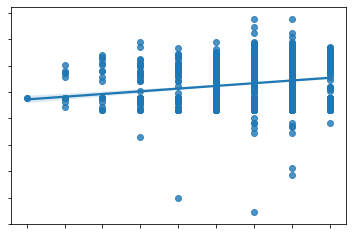

In [160]:
# Fit Gradient Boosting model into the training data and make prediction
gb = gb_model.fit(X_train,y_train)
y_pred5 = gb_model.predict(X_test)

sns.regplot(y_test, y_pred5)
plt.xlabel("Observed")
plt.ylabel("Predicted")

In [161]:
# Measure and record model accuracy
rmse5 = metrics.mean_squared_error(y_test, y_pred5)
df_rmse = df_rmse.append([{'model' : 'gradient boosting',
                           'rmse_score' : rmse5}],
                         ignore_index = True)
print('RMSE for this model is: {}'.format(rmse5))

RMSE for this model is: 0.5442324001636806


#### Grid Search

In [162]:
# Try Grid Search for hyperparameter tuning

param_grid = {
    'LR3__max_depth': [2, 3, 4, 5],
    'LR3__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.3],
    'LR3__n_estimators': [50, 100, 200, 300, 400]
}

grid_search = GridSearchCV(estimator = gb_model, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 2)
grid_search.fit(X_train, y_train)

best_grid = grid_search.best_estimator_
best_grid

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] LR3__learning_rate=0.05, LR3__max_depth=2, LR3__n_estimators=50 .
[CV]  LR3__learning_rate=0.05, LR3__max_depth=2, LR3__n_estimators=50, total=   0.1s
[CV] LR3__learning_rate=0.05, LR3__max_depth=2, LR3__n_estimators=50 .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  LR3__learning_rate=0.05, LR3__max_depth=2, LR3__n_estimators=50, total=   0.1s
[CV] LR3__learning_rate=0.05, LR3__max_depth=2, LR3__n_estimators=50 .
[CV]  LR3__learning_rate=0.05, LR3__max_depth=2, LR3__n_estimators=50, total=   0.1s
[CV] LR3__learning_rate=0.05, LR3__max_depth=2, LR3__n_estimators=100 
[CV]  LR3__learning_rate=0.05, LR3__max_depth=2, LR3__n_estimators=100, total=   0.2s
[CV] LR3__learning_rate=0.05, LR3__max_depth=2, LR3__n_estimators=100 
[CV]  LR3__learning_rate=0.05, LR3__max_depth=2, LR3__n_estimators=100, total=   0.2s
[CV] LR3__learning_rate=0.05, LR3__max_depth=2, LR3__n_estimators=100 
[CV]  LR3__learning_rate=0.05, LR3__max_depth=2, LR3__n_estimators=100, total=   0.2s
[CV] LR3__learning_rate=0.05, LR3__max_depth=2, LR3__n_estimators=200 
[CV]  LR3__learning_rate=0.05, LR3__max_depth=2, LR3__n_estimators=200, total=   0.4s
[CV] LR3__learning_rate=0.05, LR3__max_depth=2, LR3__n_estimators=200 
[CV]  LR3__learning_rate=0.05, LR3__max_depth=2, LR3__n_esti

[CV]  LR3__learning_rate=0.05, LR3__max_depth=5, LR3__n_estimators=300, total=   1.3s
[CV] LR3__learning_rate=0.05, LR3__max_depth=5, LR3__n_estimators=300 
[CV]  LR3__learning_rate=0.05, LR3__max_depth=5, LR3__n_estimators=300, total=   1.4s
[CV] LR3__learning_rate=0.05, LR3__max_depth=5, LR3__n_estimators=300 
[CV]  LR3__learning_rate=0.05, LR3__max_depth=5, LR3__n_estimators=300, total=   1.4s
[CV] LR3__learning_rate=0.05, LR3__max_depth=5, LR3__n_estimators=400 
[CV]  LR3__learning_rate=0.05, LR3__max_depth=5, LR3__n_estimators=400, total=   2.0s
[CV] LR3__learning_rate=0.05, LR3__max_depth=5, LR3__n_estimators=400 
[CV]  LR3__learning_rate=0.05, LR3__max_depth=5, LR3__n_estimators=400, total=   1.9s
[CV] LR3__learning_rate=0.05, LR3__max_depth=5, LR3__n_estimators=400 
[CV]  LR3__learning_rate=0.05, LR3__max_depth=5, LR3__n_estimators=400, total=   1.9s
[CV] LR3__learning_rate=0.1, LR3__max_depth=2, LR3__n_estimators=50 ..
[CV]  LR3__learning_rate=0.1, LR3__max_depth=2, LR3__n_est

[CV]  LR3__learning_rate=0.1, LR3__max_depth=5, LR3__n_estimators=50, total=   0.2s
[CV] LR3__learning_rate=0.1, LR3__max_depth=5, LR3__n_estimators=100 .
[CV]  LR3__learning_rate=0.1, LR3__max_depth=5, LR3__n_estimators=100, total=   0.5s
[CV] LR3__learning_rate=0.1, LR3__max_depth=5, LR3__n_estimators=100 .
[CV]  LR3__learning_rate=0.1, LR3__max_depth=5, LR3__n_estimators=100, total=   0.5s
[CV] LR3__learning_rate=0.1, LR3__max_depth=5, LR3__n_estimators=100 .
[CV]  LR3__learning_rate=0.1, LR3__max_depth=5, LR3__n_estimators=100, total=   0.5s
[CV] LR3__learning_rate=0.1, LR3__max_depth=5, LR3__n_estimators=200 .
[CV]  LR3__learning_rate=0.1, LR3__max_depth=5, LR3__n_estimators=200, total=   0.9s
[CV] LR3__learning_rate=0.1, LR3__max_depth=5, LR3__n_estimators=200 .
[CV]  LR3__learning_rate=0.1, LR3__max_depth=5, LR3__n_estimators=200, total=   0.9s
[CV] LR3__learning_rate=0.1, LR3__max_depth=5, LR3__n_estimators=200 .
[CV]  LR3__learning_rate=0.1, LR3__max_depth=5, LR3__n_estimators

[CV]  LR3__learning_rate=0.15, LR3__max_depth=4, LR3__n_estimators=300, total=   1.1s
[CV] LR3__learning_rate=0.15, LR3__max_depth=4, LR3__n_estimators=300 
[CV]  LR3__learning_rate=0.15, LR3__max_depth=4, LR3__n_estimators=300, total=   1.1s
[CV] LR3__learning_rate=0.15, LR3__max_depth=4, LR3__n_estimators=400 
[CV]  LR3__learning_rate=0.15, LR3__max_depth=4, LR3__n_estimators=400, total=   1.5s
[CV] LR3__learning_rate=0.15, LR3__max_depth=4, LR3__n_estimators=400 
[CV]  LR3__learning_rate=0.15, LR3__max_depth=4, LR3__n_estimators=400, total=   1.5s
[CV] LR3__learning_rate=0.15, LR3__max_depth=4, LR3__n_estimators=400 
[CV]  LR3__learning_rate=0.15, LR3__max_depth=4, LR3__n_estimators=400, total=   1.6s
[CV] LR3__learning_rate=0.15, LR3__max_depth=5, LR3__n_estimators=50 .
[CV]  LR3__learning_rate=0.15, LR3__max_depth=5, LR3__n_estimators=50, total=   0.3s
[CV] LR3__learning_rate=0.15, LR3__max_depth=5, LR3__n_estimators=50 .
[CV]  LR3__learning_rate=0.15, LR3__max_depth=5, LR3__n_est

[CV]  LR3__learning_rate=0.2, LR3__max_depth=4, LR3__n_estimators=100, total=   0.4s
[CV] LR3__learning_rate=0.2, LR3__max_depth=4, LR3__n_estimators=100 .
[CV]  LR3__learning_rate=0.2, LR3__max_depth=4, LR3__n_estimators=100, total=   0.4s
[CV] LR3__learning_rate=0.2, LR3__max_depth=4, LR3__n_estimators=100 .
[CV]  LR3__learning_rate=0.2, LR3__max_depth=4, LR3__n_estimators=100, total=   0.4s
[CV] LR3__learning_rate=0.2, LR3__max_depth=4, LR3__n_estimators=200 .
[CV]  LR3__learning_rate=0.2, LR3__max_depth=4, LR3__n_estimators=200, total=   0.8s
[CV] LR3__learning_rate=0.2, LR3__max_depth=4, LR3__n_estimators=200 .
[CV]  LR3__learning_rate=0.2, LR3__max_depth=4, LR3__n_estimators=200, total=   0.8s
[CV] LR3__learning_rate=0.2, LR3__max_depth=4, LR3__n_estimators=200 .
[CV]  LR3__learning_rate=0.2, LR3__max_depth=4, LR3__n_estimators=200, total=   0.8s
[CV] LR3__learning_rate=0.2, LR3__max_depth=4, LR3__n_estimators=300 .
[CV]  LR3__learning_rate=0.2, LR3__max_depth=4, LR3__n_estimator

[CV]  LR3__learning_rate=0.3, LR3__max_depth=3, LR3__n_estimators=300, total=   0.9s
[CV] LR3__learning_rate=0.3, LR3__max_depth=3, LR3__n_estimators=400 .
[CV]  LR3__learning_rate=0.3, LR3__max_depth=3, LR3__n_estimators=400, total=   1.2s
[CV] LR3__learning_rate=0.3, LR3__max_depth=3, LR3__n_estimators=400 .
[CV]  LR3__learning_rate=0.3, LR3__max_depth=3, LR3__n_estimators=400, total=   1.2s
[CV] LR3__learning_rate=0.3, LR3__max_depth=3, LR3__n_estimators=400 .
[CV]  LR3__learning_rate=0.3, LR3__max_depth=3, LR3__n_estimators=400, total=   1.2s
[CV] LR3__learning_rate=0.3, LR3__max_depth=4, LR3__n_estimators=50 ..
[CV]  LR3__learning_rate=0.3, LR3__max_depth=4, LR3__n_estimators=50, total=   0.2s
[CV] LR3__learning_rate=0.3, LR3__max_depth=4, LR3__n_estimators=50 ..
[CV]  LR3__learning_rate=0.3, LR3__max_depth=4, LR3__n_estimators=50, total=   0.2s
[CV] LR3__learning_rate=0.3, LR3__max_depth=4, LR3__n_estimators=50 ..
[CV]  LR3__learning_rate=0.3, LR3__max_depth=4, LR3__n_estimators=

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  3.6min finished


Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('norm1',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0),
                                                  [2]),
                                                 ('poly',
                                                  PolynomialFeatures(degree=3,
                            

In [163]:
# Measure and record model accuracy
y_pred6 = best_grid.predict(X_test)
rmse6 = metrics.mean_squared_error(y_test, y_pred6)
df_rmse = df_rmse.append([{'model' : 'gradient boosting_grid',
                           'rmse_score' : rmse6}], 
                         ignore_index = True)
print('RMSE for this model is: {}'.format(rmse6))

RMSE for this model is: 0.5435695693778995


#### Randomized Search

In [164]:
# Try Randomized Search for hyperparameter tuning

param_dist = {
               'LR3__max_depth': np.linspace(1, 20, 5, dtype = int),
               'LR3__learning_rate': np.linspace(0.05, 0.95, 10, dtype = float),
               'LR3__n_estimators': np.linspace(50, 600, 10, dtype = int)}

random_search = RandomizedSearchCV(estimator = gb_model, param_distributions = param_dist, 
                                   cv = 3, n_jobs = 1, verbose = 2,n_iter = 10)
random_search.fit(X_train, y_train)

best_random= random_search.best_estimator_
best_random

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] LR3__n_estimators=172, LR3__max_depth=1, LR3__learning_rate=0.25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  LR3__n_estimators=172, LR3__max_depth=1, LR3__learning_rate=0.25, total=   0.2s
[CV] LR3__n_estimators=172, LR3__max_depth=1, LR3__learning_rate=0.25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  LR3__n_estimators=172, LR3__max_depth=1, LR3__learning_rate=0.25, total=   0.2s
[CV] LR3__n_estimators=172, LR3__max_depth=1, LR3__learning_rate=0.25 
[CV]  LR3__n_estimators=172, LR3__max_depth=1, LR3__learning_rate=0.25, total=   0.2s
[CV] LR3__n_estimators=416, LR3__max_depth=5, LR3__learning_rate=0.35 
[CV]  LR3__n_estimators=416, LR3__max_depth=5, LR3__learning_rate=0.35, total=   1.9s
[CV] LR3__n_estimators=416, LR3__max_depth=5, LR3__learning_rate=0.35 
[CV]  LR3__n_estimators=416, LR3__max_depth=5, LR3__learning_rate=0.35, total=   2.0s
[CV] LR3__n_estimators=416, LR3__max_depth=5, LR3__learning_rate=0.35 
[CV]  LR3__n_estimators=416, LR3__max_depth=5, LR3__learning_rate=0.35, total=   1.9s
[CV] LR3__n_estimators=50, LR3__max_depth=15, LR3__learning_rate=0.35 
[CV]  LR3__n_estimators=50, LR3__max_depth=15, LR3__learning_rate=0.35, total=   0.6s
[CV] LR3__n_estimators=50, LR3__max_depth=15, LR3__learning_rate=0.35 
[CV]  LR3__n_estimators=50, LR3__max_depth=15, LR3__learni

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   33.6s finished


Pipeline(memory=None,
         steps=[('transformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('norm1',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0),
                                                  [2]),
                                                 ('poly',
                                                  PolynomialFeatures(degree=3,
                            

In [165]:
# Measure and record model accuracy
y_pred7 = best_random.predict(X_test)
rmse7 = metrics.mean_squared_error(y_test, y_pred7)
df_rmse = df_rmse.append([{'model' : 'gradient boosting_randomized',
                           'rmse_score' : rmse7}], 
                         ignore_index = True)
print('RMSE for this model is: {}'.format(rmse7))

RMSE for this model is: 0.5411937233329893


## 5. Model Comparasion & Selection

In [166]:
# Sort df_rmse in acsending order and display the dataframe
df_rmse.sort_values(['rmse_score'], ascending = True, inplace = True)
df_rmse.reset_index(inplace = True, drop = True)
display(df_rmse)

,model,rmse_score
0,gradient boosting_randomized,0.541194
1,gradient boosting_grid,0.543570
2,gradient boosting,0.544232
3,linear,0.546536
4,random forest_randomized,0.547141
5,random forest_grid,0.566429
6,random forest,0.575419


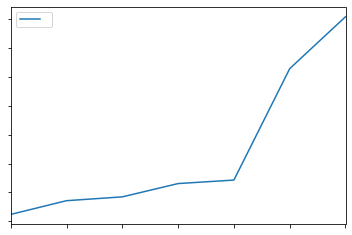

In [171]:
# Plot the dataframe in a line chart
df_rmse.plot(x = 'model',
             y = 'rmse_score',
             title = 'RMSE of models')
plt.xticks(range(len(df_rmse['model'])),
           df_rmse['model'],
           fontsize = 9,
           rotation = 30)
plt.show()

## 6. Conclusion

As we can see from the above results, Gradient Boosting Methods have best predictions with lowest RMSE scores. Linear Regression performs better than Random Forest, which is beyond my expectations. Thus, the accuracy of models on this dataset is: Gradient Boosting > Linear > Random Forest.

As for Hyperparameter Tuning methods, I tried Grid Search and Randomized Search. The result suggests that Randomized Research performs better on both Gradient Boosting and Random Forest model (Linear model does not need a hyperparameter tuning). Thus, the effectiveness of Hyperparameter Tuning methods here is: Randomized Research > Grid Research. This result could be influenced by the parameters I choose. 

To conclude, I choose the Gradient Boosting Model with Randomized Research hyperparameter tuning method as my final model to make prediction. 

In [175]:
# Create a dataframe of the final testing prediction
df_test_result = pd.DataFrame(y_pred7, columns = ['pred'])
df_test_result

,pred
0,4.192319
1,4.243731
2,4.143494
3,4.169074
4,4.081645
...,...
1508,4.230436
1509,4.143493
1510,4.182817
1511,3.980291


## 7. Implementation & Limitations

This program can be used to predict the average user ratings of mobile stratrgy games, and provide some useful instructions to mobile strategy game developers on the features of a more popular mobile game. App developers can use this model to predict whether their product would be rated a higher or lower scoro (only for reference).

However, there are a lot of limitations on this model. Firstly, there are only limited features used to train the model, many of which do not have strong connections to the target variable. Besides, I dropped all the columns with  descriptive words as they are useless in my model. If the 'Name', 'Subtitle' and 'Description' features are explored using Text Mining, the result would be much better, I believe. Since Text Mining is not covered in this course, I will try this method on the dataset in the future. Moreover, I only tried 3 different regression models and used limited number of hyperparameters to control the total runtime. I believe the results could be better if I have more time to try different parameter combos and models. 

Thank you!